In [7]:
import jupyter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import os

## Exercise 1: Logistic regression with Scikit-learn

In [7]:
from sklearn.neighbors import KNeighborsClassifier

# Given data
X = [[0],[0.1],[0.2], [1],[1.1],[1.2], [1.3]]
y = [0,0,0,1,1,1,0]
x_pred = [[0.5]]

# Initialize the model
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the model
knn.fit(X, y)

# Predict the class for x_pred
prediction = knn.predict(x_pred)

prediction[0]


0

In [8]:
probabilities = knn.predict_proba(x_pred)

probabilities

#100% for class 0 and 0% for class 1


array([[1., 0.]])

In [13]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

# Fit the model to the data
log_reg.fit(X, y)

# Coefficients and intercept
coefficients = log_reg.coef_
intercept = log_reg.intercept_

# Score of the logistic regression
score = log_reg.score(X, y)


print(f"coefficients {coefficients}")
print(f"intercept {intercept}")
print(f"score {score}")



coefficients [[0.81793264]]
intercept [-0.87524276]
score 0.7142857142857143


## Exercise 2: Sigmoid

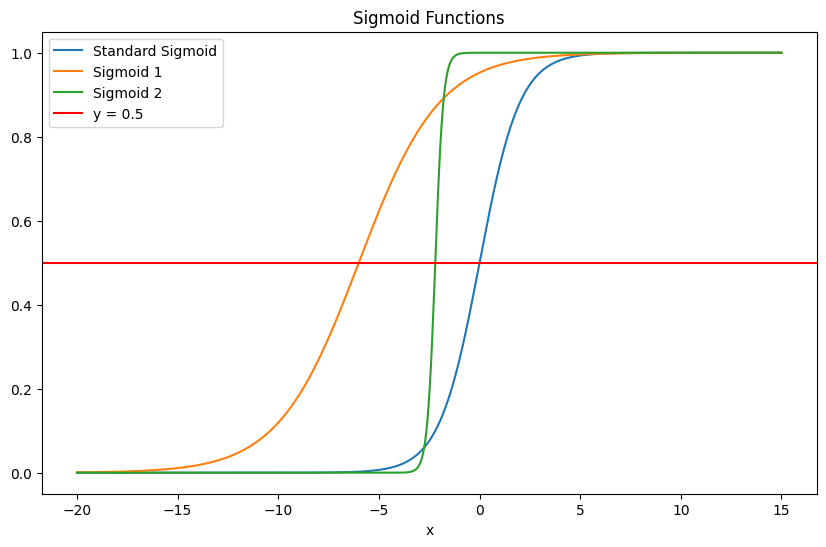

In [20]:


# Define the standard sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define custom sigmoid functions
def sigmoid1(x):
    return 1 / (1 + np.exp(-(0.5*x + 3)))

def sigmoid2(x):
    return 1 / (1 + np.exp(-(5*x + 11)))

# Generate an array of x values
x_values = np.linspace(-20, 15, 600)

# Compute the sigmoid functions for these x values
y_sigmoid = sigmoid(x_values)
y_sigmoid1 = sigmoid1(x_values)
y_sigmoid2 = sigmoid2(x_values)

# Plot the sigmoid functions
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_sigmoid, label='Standard Sigmoid')
plt.plot(x_values, y_sigmoid1, label='Sigmoid 1')
plt.plot(x_values, y_sigmoid2, label='Sigmoid 2')
plt.axhline(y=0.5, color='r', linestyle='-', label='y = 0.5')
plt.title('Sigmoid Functions')
plt.xlabel('x')
plt.legend()
plt.show()

## Exercise 3: Decision boundary

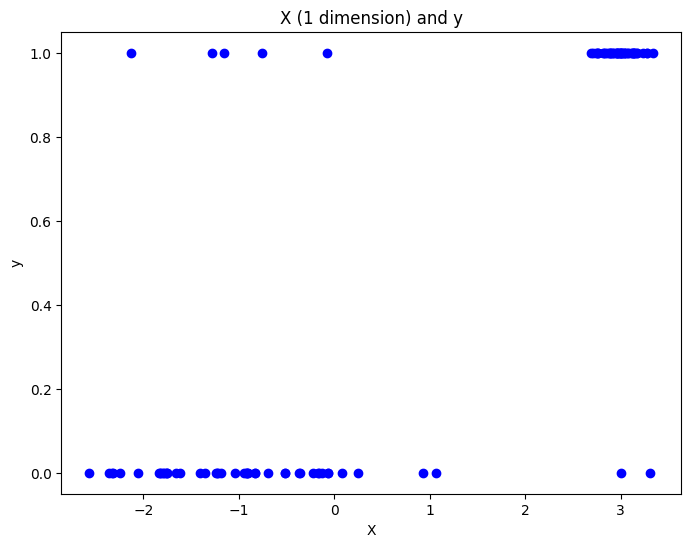

In [57]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# Generate the data
X, y = make_classification(
    n_samples=100,
    n_features=1,
    n_informative=1,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    n_clusters_per_class=1,
    weights=[0.5, 0.5],
    flip_y=0.15,
    class_sep=2.0,
    hypercube=True,
    shift=1.0,
    scale=1.0,
    shuffle=True,
    random_state=88
)

# Plotting the data
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0], y[y == 0], color='blue', label='Class 0')
plt.scatter(X[y == 1], y[y == 1], color='blue', label='Class 1')
plt.title('X (1 dimension) and y')
plt.xlabel('X')
plt.ylabel('y')
plt.show()


In [58]:
from sklearn.linear_model import LogisticRegression

# Fit a Logistic Regression model
model = LogisticRegression()
model.fit(X, y)

# Coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

coefficients, intercept

print(f"Intercept {intercept}")
print(f"Coefficient {coefficients}")

Intercept:  [-0.98385574]
Coefficient:  [[1.18866075]]

Intercept [-0.98497516]
Coefficient [[1.18885765]]


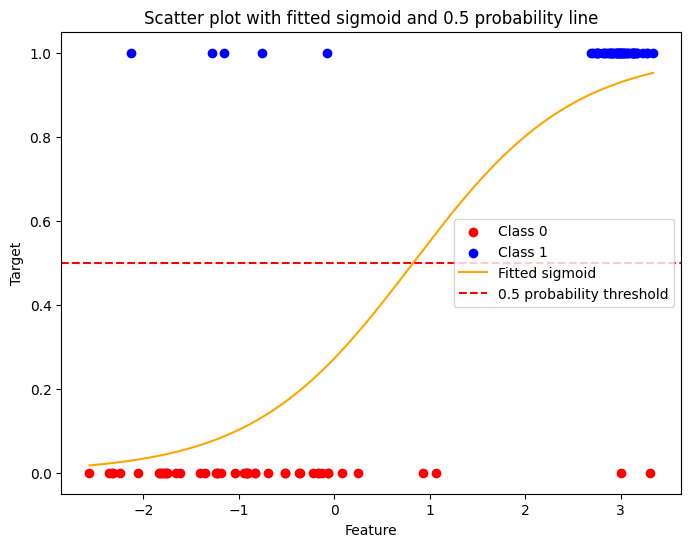

In [59]:

# Generate a range of values from the minimum to maximum value of X
x_values = np.linspace(X.min(), X.max(), 300)

# Calculate the probability predictions (sigmoid function)
y_values = model.predict_proba(x_values.reshape(-1, 1))[:, 1]

# Plotting the original data
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0], y[y == 0], color='red', label='Class 0')
plt.scatter(X[y == 1], y[y == 1], color='blue', label='Class 1')

# Adding the fitted sigmoid curve
plt.plot(x_values, y_values, color='orange', label='Fitted sigmoid')

# Adding the 0.5 probability line
plt.axhline(y=0.5, color='red', linestyle='--', label='0.5 probability threshold')

plt.title('Scatter plot with fitted sigmoid and 0.5 probability line')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()


In [60]:
# Define the predict_probability function
def predict_class(data_point, coef, intercept):
    # Calculate the linear combination of the input data and the model coefficients
    z = np.dot(data_point, coef) + intercept
    # Compute the probability for class 1 using the sigmoid function
    probability_class_1 = 1 / (1 + np.exp(-z))
    probability_class_0 = 1 - probability_class_1
    return np.column_stack((probability_class_0, probability_class_1))

# Test the function with an example data point using the coefficients and intercept from the trained model
example_data_point = np.array([[0]])  # Example data point (as a 2D array for compatibility with dot product)
predicted_probability_custom = predict_class(example_data_point, model.coef_, model.intercept_)

# Compare to the results from the predict_proba method from Scikit-learn
predicted_probability_sklearn = model.predict_proba(example_data_point)

print(f"Custom: {predicted_probability_custom}")
print(f"Sklear: {predicted_probability_sklearn}")


Custom: [[0.72809428 0.27190572]]
Sklear: [[0.72809428 0.27190572]]


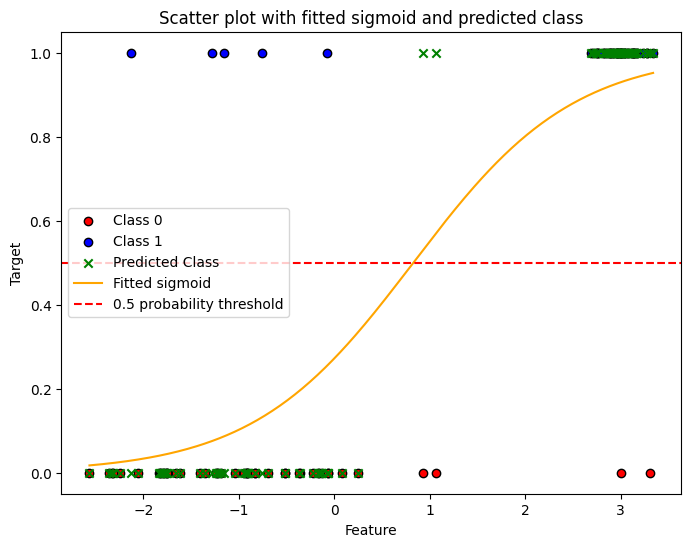

In [61]:
X_reshaped = X.reshape(-1, 1)  # Reshape X to have one column and as many rows as necessary

# Now call the decision_function on your model instance with the reshaped X
scores = model.decision_function(X_reshaped)

# If you want to predict the classes directly, you can also do:
predicted_classes = model.predict(X_reshaped)

# Plotting the original data and the fitted sigmoid curve
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0], y[y == 0], color='red', label='Class 0', edgecolors='k')
plt.scatter(X[y == 1], y[y == 1], color='blue', label='Class 1', edgecolors='k')

# Adding the predicted class,
plt.scatter(X, predicted_classes, color='green', marker='x', label='Predicted Class')

# Adding the fitted sigmoid curve
plt.plot(x_values, y_values, color='orange', label='Fitted sigmoid')

# Adding the 0.5 probability line
plt.axhline(y=0.5, color='red', linestyle='--', label='0.5 probability threshold')

# Adding title and labels
plt.title('Scatter plot with fitted sigmoid and predicted class')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()

#### 2 Dimensions

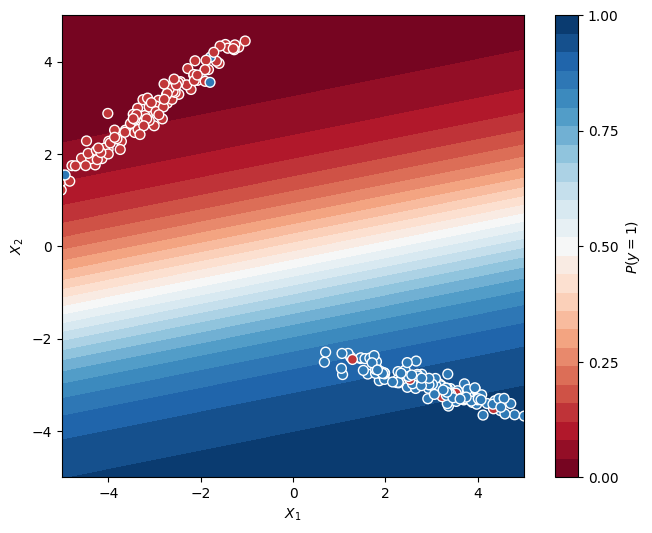

In [2]:


# Generate 2-dimensional data
X, y = make_classification(n_features=2,
                           n_redundant=0,
                           n_samples=250,
                           n_classes=2,
                           n_clusters_per_class=1,
                           flip_y=0.05,
                           class_sep=3,
                           random_state=43)

# Fit Logistic Regression
clf = LogisticRegression()
clf.fit(X, y)

# Prepare the grid for plotting decision boundary
xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)

# Plotting
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu", vmin=0, vmax=1)

ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X[:,0], X[:, 1], c=y, s=50, cmap="RdBu", vmin=-.2, vmax=1.2, edgecolor="white", linewidth=1)

ax.set(aspect="equal", xlim=(-5, 5), ylim=(-5, 5), xlabel="$X_1$", ylabel="$X_2$")
plt.show()

## Exercise 4: Train test split

In [4]:

# Define the data
X = np.arange(1, 21).reshape(10, -1)
y = np.zeros(10)
y[7:] = 1

# Split the data without shuffling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Print the splits
print("X_train:", X_train)
print("y_train:", y_train)
print("X_test:", X_test)
print("y_test:", y_test)

# Compute the proportion of class 1 in the train and test sets
proportion_train = np.mean(y_train)
proportion_test = np.mean(y_test)

proportion_train, proportion_test


X_train: [[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]
 [11 12]
 [13 14]
 [15 16]]
y_train: [0. 0. 0. 0. 0. 0. 0. 1.]
X_test: [[17 18]
 [19 20]]
y_test: [1. 1.]


(0.125, 1.0)

In [5]:
# Define the data
X = np.arange(1, 201).reshape(100, -1)
y = np.zeros(100)
y[70:] = 1

# Split the data with stratification to maintain class proportions
X_train_strat, X_test_strat, y_train_strat, y_test_strat = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y)

# Compute the proportion of class 1 in the stratified train and test sets
proportion_train_strat = np.mean(y_train_strat)
proportion_test_strat = np.mean(y_test_strat)

proportion_train_strat, proportion_test_strat


(0.3, 0.3)

## Exercise 5: Breast Cancer prediction

In [11]:
data_path = 'data/breast-cancer-wisconsin.data'
column_names = ['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size',
                'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size',
                'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']
df = pd.read_csv(data_path, names=column_names, header=None, na_values="?")

# Preliminary step 1: Replace missing values with the median of the column
df = df.fillna(df.median())

# Preliminary step 2: Drop the "Sample code number" column
df.drop('Sample code number', axis=1, inplace=True)

# Analyze the class distribution for "Benign"
# Note: In this dataset, '2' represents benign, and '4' represents malignant
benign_proportion = (df['Class'] == 2).mean()
accuracy_always_benign = benign_proportion

benign_proportion, accuracy_always_benign

(0.6552217453505007, 0.6552217453505007)

In [13]:
df

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2.0,1,1,1,2
695,2,1,1,1,2,1.0,1,1,1,2
696,5,10,10,3,7,3.0,8,10,2,4
697,4,8,6,4,3,4.0,10,6,1,4


In [12]:
# Split the dataset into train and test sets with stratification
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43, stratify=y)

# Verify the proportion of class Benign in both the train and test sets
train_benign_proportion = (y_train == 2).mean()
test_benign_proportion = (y_test == 2).mean()

(train_benign_proportion, test_benign_proportion)


(0.6547406082289803, 0.6571428571428571)

In [15]:
from sklearn.metrics import accuracy_score

# Fit the logistic regression model on the training set
model = LogisticRegression(max_iter=10000, random_state=43)
model.fit(X_train, y_train)

# Predict on the train set and test set
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Compute the accuracy score on the train set and test set
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

(train_accuracy, test_accuracy)


(0.9695885509838998, 0.9642857142857143)

In [16]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix for both the train and test sets
confusion_matrix_train = confusion_matrix(y_train, y_train_pred)
confusion_matrix_test = confusion_matrix(y_test, y_test_pred)

(confusion_matrix_train, confusion_matrix_test)


(array([[357,   9],
        [  8, 185]], dtype=int64),
 array([[90,  2],
        [ 3, 45]], dtype=int64))